# Exercício Semana 8 - SIN5014
Renato Banzai n. USP 3683321


1 - Implemente um algoritmo que considere a borda de um objeto representado em uma
imagem e devolva a assinatura deste objeto.

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

'''
get image signature
img: image array
centroid_x: x position of the centroid
centroid_y: y position of the centroid
precision: quantity of angles in 2pi to create the signature
'''
def get_signature(img, centroid_x, centroid_y, precision):
    result = {}
    angle_list = [0]
    angle = 0
    # calculating all angle points
    for point in range(precision - 1):
        angle += (2 / precision) * np.pi
        angle_list.append(angle)
    
    # loop into all angle points
    for theta in angle_list:
        bg_color = 255
        sin = math.sin(theta)
        cos = math.cos(theta)
        size = 0
        x = centroid_x
        y = centroid_y
        # using a 3x3 matrix to avoid 
        # cross a diagonal 
        while (int(img[y - 1, x + 1])
               + int(img[y - 1, x])
               + int(img[y - 1, x - 1])
               + int(img[y, x + 1])
               + int(img[y, x])
               + int(img[y, x - 1])
               + int(img[y + 1, x + 1])
               + int(img[y + 1, x])
               + int(img[y + 1, x - 1])
        ) == (bg_color * 9):
            size += 1
            x = centroid_x + int(size * cos)
            y = centroid_y + int(size * sin)
            #print("theta", theta, "size", size, "x", x, "y", y)
        result[theta] = size + 1
    #print(result)
    return result

'''
get the x and y position of the centroid of image
'''
def get_image_centroid(img):
    bg_color = 255
    line_qty = len(img)
    column_qty = len(img[0])
    top_y = -1
    bottom_y = line_qty
    left_x = -1
    right_x = column_qty

    # looking for the topmost borderpoint 
    for line in range(line_qty):
        for column in range(column_qty):
            if img[line, column] != bg_color:
                top_y = line
                break
        if top_y > -1:
            break

    # looking fot the leftmost borderpoint
    for column in range(column_qty):
        for line in range(line_qty):
            if img[line, column] != bg_color:
                left_x = column
                break
        if left_x > -1:
            break

    # looking fot the bottommost borderpoint
    for line in range(line_qty - 1, 0, -1):
        for column in range(column_qty):
            if img[line, column] != bg_color:
                bottom_y = line
                break
        if bottom_y < line_qty:
            break

    # looking fot the rightmost borderpoint
    for column in range(column_qty - 1, 0, -1):
        for line in range(line_qty):
            if img[line, column] != bg_color:
                right_x = column
                break
        if right_x < column_qty:
            break

    mid_x = ((right_x - left_x) / 2) + left_x
    mid_y = ((bottom_y - top_y) / 2) + top_y
    #print(int(left_x), int(right_x))
    return (int(mid_x), int(mid_y))


2 - Implemente um programa que invoque o algoritmo do exercício 1, analise a assinatura e
imprima se a figura está mais próxima de um quadrado, retângulo ou círculo. Deve ser
postado o programa fonte, as imagens de entrada e a classificação dada pelo programa
(arquivo PDF).

In [2]:
'''
Analyse a signature and returns a classification of the signature
'''
def get_object_shape_by_signature(signature):
    #get the standard deviation    
    std = np.std(list(signature.values()))
    res = ""    
    # Decidindo o tipo de imagem baseado no desvio padrão
    if std < 1.5:
        res = "Círculo"
    if std >= 1.5 and std < 4:
        res = "Quadrado"
    if std > 4:
        res = "Retângulo"
    return res

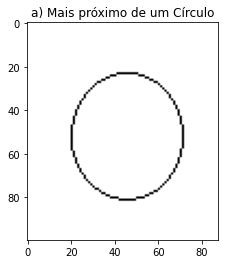

In [3]:
imga = cv2.imread("exerc2a.bmp", 0)
centroid_xa, centroid_ya = get_image_centroid(imga)
signa = get_signature(imga, centroid_xa, centroid_ya, 8)
plt.imshow(imga, cmap="gray")
# get the object shape and show below the image
# put on the title
plt.title("a) Mais próximo de um " + 
          get_object_shape_by_signature(signa))
plt.show()



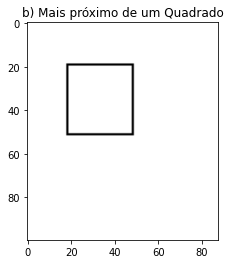

In [4]:
imgb = cv2.imread("exerc2b.bmp", 0)
centroid_xb, centroid_yb = get_image_centroid(imgb)
signb = get_signature(imgb, centroid_xb, centroid_yb, 8)
plt.imshow(imgb, cmap="gray")
# get the object shape and show below the image
# put on the title
plt.title("b) Mais próximo de um " + 
          get_object_shape_by_signature(signb))
plt.show()


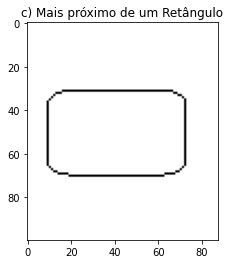

In [5]:
imgc = cv2.imread("exerc2c.bmp", 0)
centroid_xc, centroid_yc = get_image_centroid(imgc)
signc = get_signature(imgc, centroid_xc, centroid_yc, 8)
plt.imshow(imgc, cmap="gray")
# get the object shape and show below the image
# put on the title
plt.title("c) Mais próximo de um " + 
          get_object_shape_by_signature(signc))
plt.show()


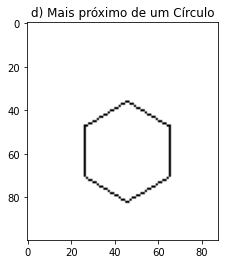

In [6]:
imgd = cv2.imread("exerc2d.bmp", 0)
centroid_xd, centroid_yd = get_image_centroid(imgd)
signd = get_signature(imgd, centroid_xd, centroid_yd, 8)
plt.imshow(imgd, cmap="gray")
# get the object shape and show below the image
# put on the title
plt.title("d) Mais próximo de um " + 
          get_object_shape_by_signature(signd))
plt.show()

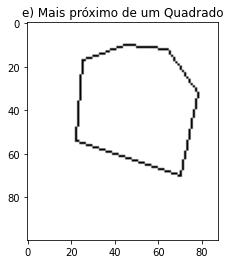

In [7]:
imge = cv2.imread("exerc2e.bmp", 0)
centroid_xe, centroid_ye = get_image_centroid(imge)
signe = get_signature(imge, centroid_xe, centroid_ye, 8)
plt.imshow(imge, cmap="gray")
# get the object shape and show below the image
# put on the title
plt.title("e) Mais próximo de um " + 
          get_object_shape_by_signature(signe))
plt.show()

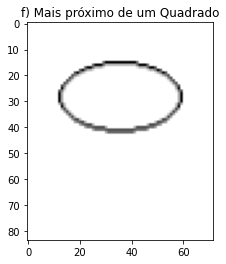

In [8]:
imgf = cv2.imread("exerc2f.bmp", 0)
centroid_xf, centroid_yf = get_image_centroid(imgf)
signf = get_signature(imgf, centroid_xf, centroid_yf, 8)
plt.imshow(imgf, cmap="gray")
# get the object shape and show below the image
# put on the title
plt.title("f) Mais próximo de um " + 
          get_object_shape_by_signature(signf))
plt.show()

3 -Implementar o algoritmo de esqueletização de Zhang e Suen e testar com as imagens
abaixo. Deve ser postado o programa fonte, as imagens de entrada e as imagens
resultantes (arquivo PDF).

In [9]:
def zhang_suen_skeletization(img):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("entrada")
    # make the image array a binary (0 background, 1 border)
    result = ""
    lines = len(img)
    columns = len(img[0])
    for line in range(lines):
        for column in range(columns):
            if img[line, column] > 0:
                img[line, column] = 0
            else:
                img[line, column] = 1

    # bounds of the loops
    line_start = 1
    line_end = lines - 1
    column_start = 1
    column_end = columns - 1
    need_more_steps = True
    while need_more_steps == True:
        eliminate_list_1 = []
        # step 1
        for line in range(line_start, line_end):
            for column in range(column_start, column_end):
                # apply only to border points
                if(img[line, column] == 1):
                    p2 = img[line - 1, column]
                    p3 = img[line - 1, column + 1]
                    p4 = img[line, column + 1]
                    p5 = img[line + 1, column + 1]
                    p6 = img[line + 1, column]
                    p7 = img[line + 1, column -1]
                    p8 = img[line, column - 1]
                    p9 = img[line -1, column - 1]

                    list_neighbors = [p2, p3, p4, p5, p6, p7, p8, p9]

                    n_p1 = sum(list_neighbors)
                    list_neighbors_transition = [p2, p3, p4, p5, p6, p7, p8, p9, p2]
                    s_p1 = 0
                    for pos in range(8):
                        if list_neighbors_transition[pos] == 0 and list_neighbors_transition[pos + 1] == 1:
                            s_p1 += 1

                    p2p4p6 = p2 * p4 * p6
                    p4p6p8 = p4 * p6 * p8

                    if 2 <= n_p1 <= 6 and s_p1 == 1 and p2p4p6 == 0 and p4p6p8 == 0:
                        eliminate_list_1.append((line, column))

        # clean points from eliminate list 1
        for point in eliminate_list_1:
            img[point[0], point[1]] = 0

        #step 2
        eliminate_list_2 = []
        for line in range(line_start, line_end):
            for column in range(column_start, column_end):
                # apply only to border points
                if (img[line, column] == 1):
                    p2 = img[line - 1, column]
                    p3 = img[line - 1, column + 1]
                    p4 = img[line, column + 1]
                    p5 = img[line + 1, column + 1]
                    p6 = img[line + 1, column]
                    p7 = img[line + 1, column - 1]
                    p8 = img[line, column - 1]
                    p9 = img[line - 1, column - 1]

                    list_neighbors = [p2, p3, p4, p5, p6, p7, p8, p9]

                    n_p1 = sum(list_neighbors)
                    list_neighbors_transition = [p2, p3, p4, p5, p6, p7, p8, p9, p2]
                    s_p1 = 0
                    for pos in range(8):
                        if list_neighbors_transition[pos] == 0 and list_neighbors_transition[pos + 1] == 1:
                            s_p1 += 1

                    p2p4p8 = p2 * p4 * p8
                    p2p6p8 = p2 * p6 * p8

                    if 2 <= n_p1 <= 6 and s_p1 == 1 and p2p4p8 == 0 and p2p6p8 == 0:
                        eliminate_list_2.append((line, column))

        # clean points from eliminate list 2
        for point in eliminate_list_2:
            img[point[0], point[1]] = 0

        if len(eliminate_list_1) > 0 or len(eliminate_list_2) > 0:
            need_more_steps = True
        else:
            need_more_steps = False

    ax[1].imshow(img, cmap="binary")
    ax[1].set_title("resultado")
    plt.show()

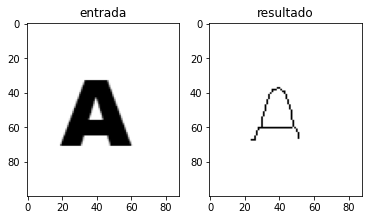

In [10]:
img3a = cv2.imread("exerc3a.bmp", 0)
zhang_suen_skeletization(img3a)

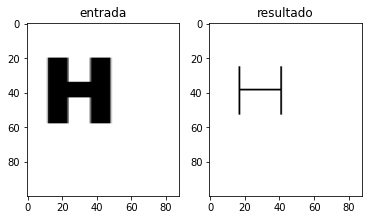

In [11]:
img3b = cv2.imread("exerc3b.bmp", 0)
zhang_suen_skeletization(img3b)

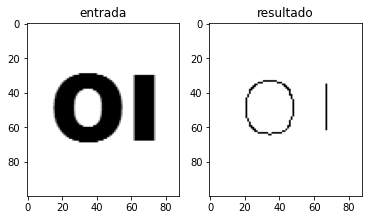

In [12]:
img3c = cv2.imread("exerc3c.bmp", 0)
zhang_suen_skeletization(img3c)

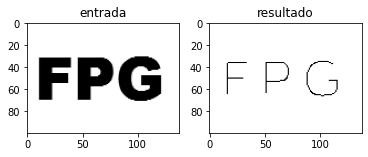

In [13]:
img3d = cv2.imread("exerc3d.bmp", 0)
zhang_suen_skeletization(img3d)

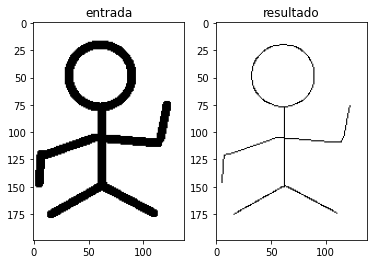

In [14]:
img3e = cv2.imread("exerc3e.bmp", 0)
zhang_suen_skeletization(img3e)